In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


In [8]:
df = pd.read_csv("twitter_training.csv")
print(df.head())

   Tweet ID\n\n       Entity Sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   

                                       Tweet content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [16]:
# Dropping rows with missing text or sentiment
df = df.dropna(subset=['Tweet content', 'Sentiment'])
df['Sentiment'] = df['Sentiment'].str.lower()

In [18]:
# cleaning the data

def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)   # removing URLs
    text = re.sub(r"@\w+", "", text)      # removeing mentions
    text = re.sub(r"#\w+", "", text)      # removing hashtags
    text = text.lower()
    text = text.strip()
    return text

df['clean_text'] = df['Tweet content'].apply(clean_text)

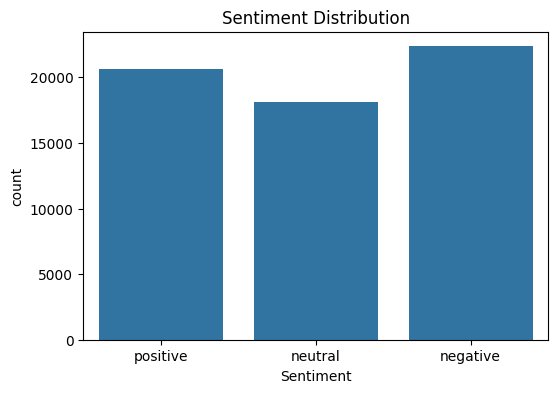

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, order=['positive','neutral','negative'])
plt.title("Sentiment Distribution")
plt.show()

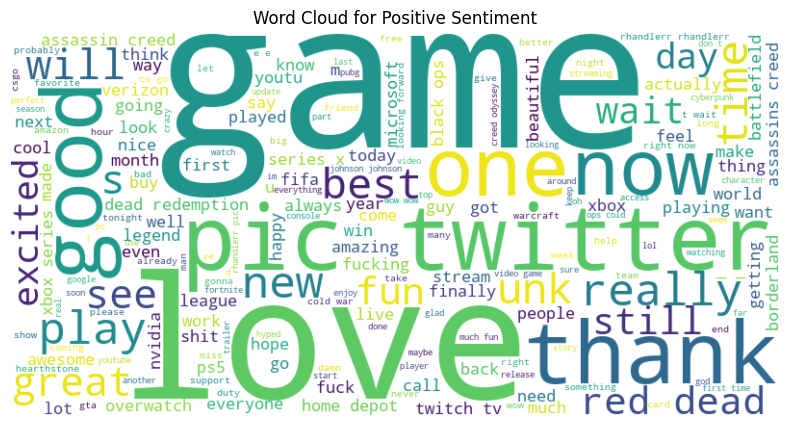

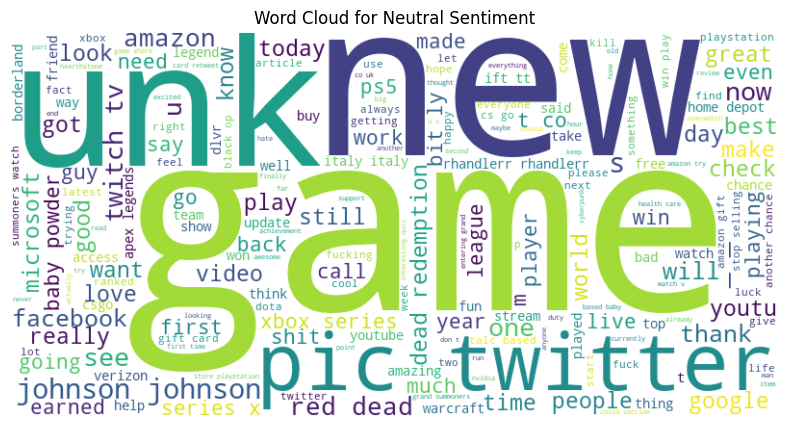

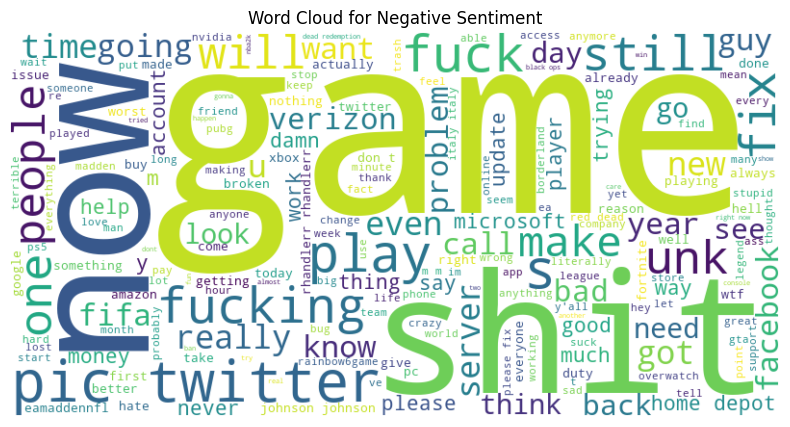

In [22]:
# visualising word clouds

for sentiment in ['positive','neutral','negative']:
    text_data = " ".join(df[df['Sentiment']==sentiment]['clean_text'])
    if len(text_data.strip()) == 0:
        continue  # skip if empty
    wc = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment.capitalize()} Sentiment")
    plt.show()